In [1]:
import numpy as np
import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

In [2]:
#the functions that I want to integrate
def Func(x):
    #return np.exp(-(x-0.3)**2/(2*0.05**2))
    return np.sin(x*10)*np.exp(-(x-0.3)**2/(2*0.05**2))

#the np.abs(Func) because it is needed for the calculation of the weights
def absFunc(x):
    return np.abs(Func(x))

In [3]:
#define the numbers of bins and samples
NBins=30
NSamplesPerBin=100
NSamples=NBins*NSamplesPerBin

In [4]:
#define the grid
GridPoints=np.linspace(0,1,NBins+1)#a grid of NBins bins needs NBins+1 points to be defined!

#find the bin sizes (later I will defe a function to do this, beacuse I'll use it multiple times)
BinSize=[]
for i in range(NBins):
    BinSize.append(GridPoints[i+1]-GridPoints[i])
    

In [5]:
#define the distribution
def Dist(i,number_of_bins=NBins):
    '''
    Since we have a constant distribution in each bin,
    we only need the number of the bin as input.
    '''
    return 1/float(number_of_bins)*1/float(BinSize[i])

#check the normalization
#np.sum(map(lambda i: Dist(i)*BinSize[i],range(NBins)))

In [6]:
def TotalInt(Func,Samples,GridPoints,BinSize):
    global NBins,NSamplesPerBin
    #calculate the integral of Func in [0,1]
    Integral=0
    for Bin in range(NBins):
        _min=GridPoints[Bin]
        _max=GridPoints[Bin+1]
        for Sample in Samples[Bin]:
            Integral+=Func(Sample)*BinSize[Bin]/float(NSamplesPerBin)

    return Integral

In [7]:
def BinInt(Func,Bin,Samples,GridPoints,BinSize):
    global NBins,NSamplesPerBin
    #calculate the integral of Func in the i Bin
    Integral=0

    _min=GridPoints[Bin]
    _max=GridPoints[Bin+1]
    for Sample in Samples[Bin]:
        Integral+=Func(Sample)*BinSize[Bin]/float(NSamplesPerBin)

    return Integral

In [8]:
NRuns=100
alpha=0.5
K=1000.

for Run in range(NRuns):
    #Generate the samples
    #initialize Samples array with dimensions [NSamplesPerBin][NBins] (for simplicity)
    Samples=[[0 for i in range(NSamplesPerBin)] for j in range(NBins)]
    for Bin in range(NBins):
        _min=GridPoints[Bin]
        for Sample in range(NSamplesPerBin):
            #samples iin each bin (ie in [GridPoints[Bin],GridPoints[Bin+1]])
            Samples[Bin][Sample]=np.random.rand()*BinSize[Bin]+_min


    #calculate the m_i's (call them weights)
    Weights=[ 0 for i in range(NBins)]

    Total=TotalInt(absFunc,Samples,GridPoints,BinSize)
    for Bin in range(NBins):
        Weights[Bin]=BinInt(absFunc,Bin,Samples,GridPoints,BinSize)/Total#this is m_{i}/K in Lapage's paper.
        Weights[Bin]=K*((Weights[Bin]-1)/np.log(Weights[Bin]/K))**alpha+1. #this is m_{i}+1 with the log included


    #define the new GridPoints
    NewGridPoints=[0 for i in GridPoints]
    NewBinSize=[0 for i in BinSize]


    #calculate the newBinSize[0], so that all entries in newBinSize add up to 1. 
    _Dx0=0#the i=j=0 does not enter the j loop, so the first run gives just _Dx0=1
    for i in range(NBins):
        _tmp=1
        for j in range(i):
            _tmp*=(BinSize[j+1]/BinSize[j]*Weights[j]/Weights[j+1])
        _Dx0+=_tmp
    NewBinSize[0]=_Dx0**(-1)

    #iteratively you can now calculate the others as well
    s=0
    for i in range(1,NBins):
        NewBinSize[i]=NewBinSize[i-1]*(BinSize[i]/BinSize[i-1]*Weights[i-1]/Weights[i])


    #set the BinSize to be the NewBinSize
    del BinSize
    BinSize=NewBinSize[:]

    for i in range(1,NBins+1):
        NewGridPoints[i]=NewGridPoints[i-1]+BinSize[i-1]

    del GridPoints
    GridPoints=NewGridPoints[:]

<IPython.core.display.Javascript object>


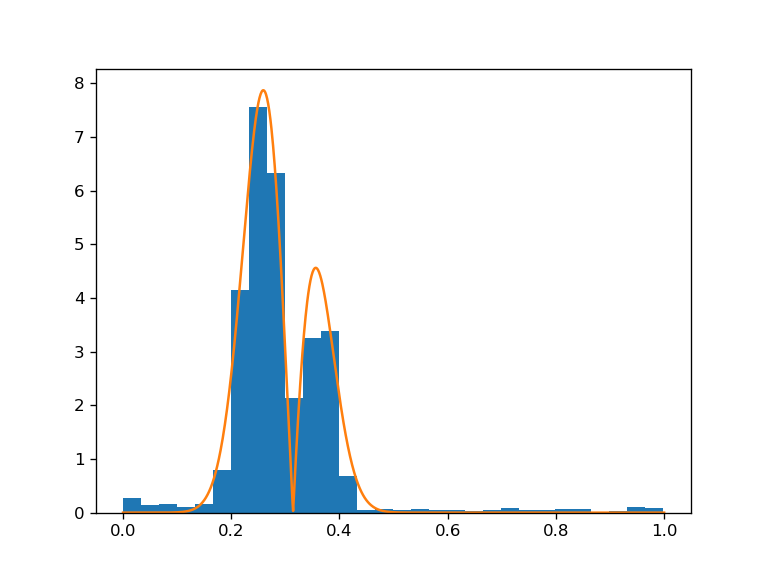

In [9]:
Samples=[[0 for i in range(NSamplesPerBin)] for j in range(NBins)]
for Bin in range(NBins):
    _min=GridPoints[Bin]
    for Sample in range(NSamplesPerBin):
        #samples iin each bin (ie in [GridPoints[Bin],GridPoints[Bin+1]])
        Samples[Bin][Sample]=np.random.rand()*BinSize[Bin]+_min

        
plt.hist([i for f in Samples for i in f ],bins=NBins,density=1)

from scipy.integrate import quad
_norm=quad(absFunc,0,1)[0]
_x=np.linspace(0,1,1000)
_y=[absFunc(i)/_norm for i in _x]
plt.plot(_x,_y)

plt.show()

In [10]:
Samples=[[0 for i in range(NSamplesPerBin*10)] for j in range(NBins)]

for Bin in range(NBins):
    _min=GridPoints[Bin]
    for Sample in range(NSamplesPerBin):
        #samples iin each bin (ie in [GridPoints[Bin],GridPoints[Bin+1]])
        Samples[Bin][Sample]=np.random.rand()*BinSize[Bin]+_min


TotalInt(Func,Samples,GridPoints,BinSize)

0.014807322897696684

In [11]:
quad(Func,0,1)[0]

0.015608519853793454